In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

(507, 537, 3)

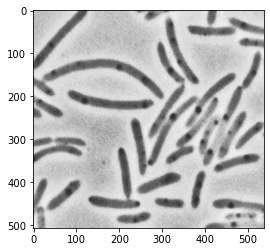

In [9]:
image = plt.imread('bacteria.png')
plt.imshow(image)
image.shape

(507, 537)

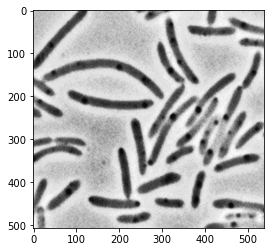

In [11]:
# -> 3dimensions -> remettre en 2 dimensions
image = plt.imread('bacteria.png')
image = image[:,:,0]
plt.imshow(image, cmap='gray')
image.shape

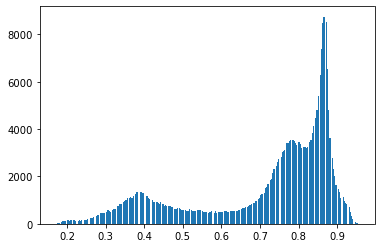

In [12]:
# ok image en 2D -> on peut commencer
imageBis = image.copy()
plt.hist(imageBis.ravel(), bins=255)
plt.show()

In [13]:
# -> 3 pics -> 3tendances de couleurs et donc de pixel -> ça colle bien avec l'image
# booléen indexing pour garder les bactéries -> <0.5
imageBis = imageBis <0.5
imageBis

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

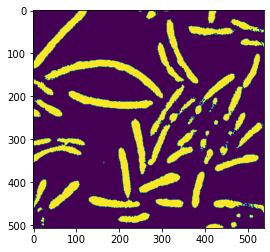

In [16]:
# on a un masque
# -> c'est une image en lui même -> plt.show
plt.imshow(imageBis)

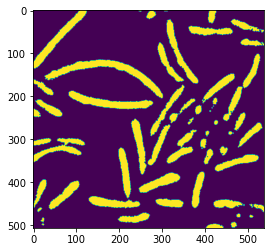

In [19]:
# on peut enlever quelques artefacts -> qui ne sont pas des bactéries et qui polluent le signal
from scipy import ndimage
open_x = ndimage.binary_opening(imageBis)
plt.imshow(open_x)

In [20]:
# Maintenant on va utiliser la fct label dans ndimage pour segmenter cette image et mettre une étiquette sur chaque bactérie
#cette fct label retourne 2 variables -> 1) image sur laquelle on met une étiquette sur chaque bactéries qu'on peut voir
# -> 2) le nombre d'étiquette qu'on a pu placer sur cette image
label_image, n_labels = ndimage.label(open_x)
print(n_labels)

65


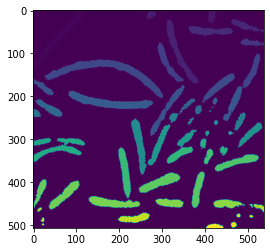

In [21]:
# 65 éléments identifiés
# pour les visualiser
plt.imshow(label_image)

In [24]:
# La fct sum() dans ndimage va nous permettre de compter tous les pixels qu'il y a dans chaque groupe
# et nous donner par exemple une taille qui sera une taille relative de nos bactéries
sizes = ndimage.sum(open_x, label_image, range(n_labels))
sizes

array([   0., 2931.,   23.,   26.,  442.,  298., 2277.,  779., 1466.,
         37.,  542.,   27., 1380., 1112., 4877., 1357.,  640., 1576.,
       1126., 3347.,  123.,  357.,  950.,  248.,    5.,    5.,  251.,
         12.,  512.,  300.,    5.,   93., 2025.,   80.,  935., 1333.,
        668.,   79.,   66.,  459., 2120.,  238.,  255.,  993., 1795.,
          8.,  416., 1548., 1324., 1890.,  761., 1554., 1943.,  998.,
        985.,   11.,   36.,  227.,   66., 1039.,   66.,   44.,   56.,
        139.,   19.])

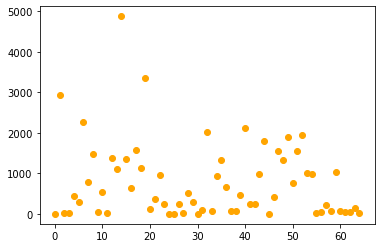

In [25]:
# sizes est un tableau numpy qui comprend 65 éléments
# et on a la taille de chaques éléments qu'il y a sur notre photo
# on peut avec matplotlib afficher toutes les tailles à l'écran
plt.scatter(range(n_labels), sizes, c='orange')

Nous voila avec un dataset
on pourrait faire des moyennes, ou autres stat, écarttype ...